In [89]:
import os
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#connect to the database, hosted via Docker
host = os.getenv('MYSQL_HOST')
port = os.getenv('MYSQL_PORT')
user = os.getenv('MYSQL_USER')
password = os.getenv('MYSQL_PASSWORD')

conn = pymysql.connect(
    host=host,
    port=int(port),
    user=user,
    passwd=password,
    db='strava',
    charset='utf8mb4')

In [17]:
df = pd.read_sql_query("SELECT * FROM Activities",
    conn)
df.tail(10)

,ID,AthleteID,Name,Distance,MovingTime,ElapsedTime,TotalElevationGain,ElevHigh,ElevLow,Type,StartDate
4181,10015609233,12770650,Afternoon Ride,12892,2088,2088,280,1863.2,1610.0,Ride,2023-10-10 21:57:10
4182,10016433696,31236472,"8 x 400m (@76s, /90s)",10469,3433,3681,42,1631.0,1615.0,Run,2023-10-10 23:30:38
4183,10022431972,12770650,In Motion - back to running!,9106,2411,2706,49,1609.6,1588.6,Run,2023-10-12 00:05:58
4184,10022500168,31236472,Evening Run,9096,2401,2699,39,1610.0,1587.0,Run,2023-10-12 00:06:01
4185,10033437876,12770650,Afternoon Run,4831,1311,1407,29,1638.8,1611.6,Run,2023-10-13 22:35:06
4186,10034197433,31236472,Afternoon Run,10476,2905,2905,27,1619.0,1578.0,Run,2023-10-12 23:40:53
4187,10034197440,31236472,Skunk and Mesa trail,13776,4665,4921,274,1894.0,1595.0,Run,2023-10-13 23:16:09
4188,10038762500,12770650,Eclipse + Walker,12794,4999,6297,531,2252.6,1965.6,Run,2023-10-14 16:15:33
4189,10039269849,31236472,Afternoon Trail Run,10156,3043,3043,39,1656.0,1613.0,Run,2023-10-14 20:00:29
4190,10045745816,31236472,Long run workout - mile on/off,24961,6442,7180,134,1638.0,1610.0,Run,2023-10-15 17:49:21


In [40]:
#just query Chris's data, only select bike rides longer than 30km
df = pd.read_sql_query("SELECT * FROM Activities where AthleteID=31236472 AND Distance > 30000 AND Type = 'Ride'",
    conn)
df

,ID,AthleteID,Name,Distance,MovingTime,ElapsedTime,TotalElevationGain,ElevHigh,ElevLow,Type,StartDate
0,3286521020,31236472,Sunshine Canyon grind,33526,5632,7166,640,2148.8,1596.8,Ride,2020-04-11 19:27:48
1,3679108761,31236472,Morning Ride,32106,5150,7176,263,1637.8,1579.5,Ride,2020-06-27 13:37:50
2,3752062619,31236472,Bike to Walker Ranch,34456,6732,7230,941,2324.4,1603.4,Ride,2020-07-12 13:44:24
3,3816116894,31236472,Bike to Gold Hill,44580,8696,9821,1078,2526.6,1622.2,Ride,2020-07-26 14:09:23
4,3884360998,31236472,Mount Evans,46058,9516,14382,1040,4250.6,3260.4,Ride,2020-08-08 12:34:33
5,3983266468,31236472,Brainard Lake!,90666,16361,18383,1812,3126.0,1631.2,Ride,2020-08-29 13:09:37
6,9569527129,31236472,Morning Ride,32792,4963,5272,240,1720.0,1598.0,Ride,2023-08-02 12:58:09
7,9641048232,31236472,Morning Ride,33142,5870,6673,647,2137.0,1583.0,Ride,2023-08-13 14:44:03
8,9733370666,31236472,Somewhat harder than I was expecting!,86427,18500,22367,1895,2651.0,1619.0,Ride,2023-08-27 14:41:05
9,9824613509,31236472,Buffalo Bike Classic Epic 100 miles,164294,27364,29267,2352,2847.0,1553.0,Ride,2023-09-10 13:01:03


In [43]:
#Select Sean and Chris's marathon length runs
df = pd.read_sql_query("SELECT * FROM Activities where Distance > 41500 AND Distance < 43500 AND Type = 'Run'",
    conn)
df

,ID,AthleteID,Name,Distance,MovingTime,ElapsedTime,TotalElevationGain,ElevHigh,ElevLow,Type,StartDate
0,724882378,12770650,Boulder Backroads Marathon!,42732,14172,14294,259,1653.8,1576.0,Run,2016-09-25 13:19:52
1,774959103,12770650,Las Vegas marathon,42589,14032,14032,47,667.0,608.2,Run,2016-11-14 00:31:24
2,906664282,12770650,Los Angeles Marathon,42659,14087,14135,296,170.7,31.5,Run,2017-03-19 13:56:39
3,1252005135,12770650,Dublin Marathon!,42445,13061,13097,209,58.0,-14.4,Run,2017-10-29 09:10:51
4,1300985852,12770650,California International Marathon. New maratho...,42372,12417,12428,188,98.6,-30.6,Run,2017-12-03 14:59:58
5,1423774291,12770650,Phoenix Marathon - another marathon PR!,42216,12069,12107,93,616.8,323.2,Run,2018-02-24 13:00:25
6,1459910375,12770650,Asheville Marathon!,42292,13858,14100,338,670.0,564.8,Run,2018-03-18 11:30:17
7,1736536342,12770650,San Francisco Marathon,42429,13936,13977,397,242.4,138.2,Run,2018-07-29 12:31:00
8,2804334937,31236472,Toronto Waterfront Marathon,42539,11754,11803,152,112.8,71.1,Run,2019-10-20 12:45:46
9,3166323595,12770650,LA Marathon - marathon and half marathon PR 😄,42532,11081,11081,262,176.0,32.2,Run,2020-03-08 14:03:47


In [66]:
#Select Chris's 5km fast runs, i.e. faster than 21 minutes. Then plot over time
max_time = 60*21
Chris5km = pd.read_sql_query(f"SELECT * FROM Activities where AthleteID=31236472 AND Distance > 4900 AND Distance < 5100 AND MovingTime < {max_time} AND Type = 'Run' ORDER BY StartDate",
    conn)
Chris5km

,ID,AthleteID,Name,Distance,MovingTime,ElapsedTime,TotalElevationGain,ElevHigh,ElevLow,Type,StartDate
0,4395199624,31236472,5K PB - Norwich parkrun #330,5051,1066,1066,15,34.3,29.9,Run,2016-12-10 09:03:49
1,1602904203,31236472,Afternoon Run,5077,1085,1795,40,1633.6,1598.2,Run,2018-03-15 23:13:24
2,1602904194,31236472,Morning Run,5018,1159,1159,25,1630.0,1608.6,Run,2018-03-17 15:09:03
3,1602904243,31236472,Afternoon Run,5040,1112,1295,30,1626.0,1596.1,Run,2018-03-22 23:16:13
4,1602904144,31236472,Evening Run,5039,1166,1166,16,1587.7,1581.4,Run,2018-04-11 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...
69,7402777809,31236472,Avery Beach parkrun - Course Record 18:34,4982,1114,1124,29,294.0,281.0,Run,2022-07-02 13:01:54
70,7750215868,31236472,Black Rock City 5K Race,5043,1206,1206,12,1188.0,1183.0,Run,2022-09-01 16:45:45
71,7786138756,31236472,Morning Run,4949,1174,1174,11,1619.0,1608.0,Run,2022-09-10 14:04:14
72,9412345562,31236472,Morning Run,4936,1123,1123,18,1627.0,1611.0,Run,2023-07-08 14:03:54


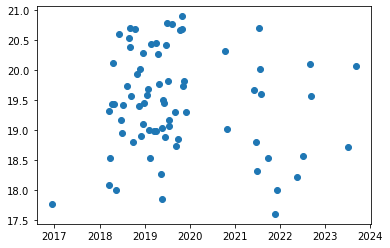

In [126]:
#plot parkrun hard effors or 5km races
plt.scatter(Chris5km['StartDate'], Chris5km['MovingTime']/60)

In [158]:
#Look for instances of PR or PB in the name of the activities
ChrisPRs = pd.read_sql_query(f"SELECT * FROM Activities where AthleteID=31236472 AND Name REGEXP '\\\\b(PB|PR)\\\\b'", conn)
ChrisPRs

,ID,AthleteID,Name,Distance,MovingTime,ElapsedTime,TotalElevationGain,ElevHigh,ElevLow,Type,StartDate
0,2257867987,31236472,Half Marathon Training Run (accidental PB),21102,5416,5586,95,41.7,3.8,Run,2019-04-01 16:38:00
1,2289948993,31236472,Platte River Half Marathon (PB and age group w...,21148,5379,5379,57,1631.8,1582.0,Run,2019-04-14 14:00:02
2,2373342807,31236472,Alternating 5:00/km and 5K PB pace,7010,1903,1903,30,34.5,24.1,Run,2019-05-16 19:31:49
3,4395199624,31236472,5K PB - Norwich parkrun #330,5051,1066,1066,15,34.3,29.9,Run,2016-12-10 09:03:49
4,4395218093,31236472,"10K PB, Reykjavik 10K",10078,2324,2324,38,81.2,69.0,Run,2017-08-19 09:34:53
5,4395224325,31236472,"1 hour PB, Leamington C & AC Club Champs",14998,3600,3600,0,47.8,47.1,Run,2014-09-03 18:01:26
6,5915549525,31236472,Fortitude 10K (37:45 PB),10086,2265,2265,26,1540.3,1522.3,Run,2021-09-06 14:00:05
7,6017282573,31236472,SBC parkrun PB,5023,1112,1112,17,1627.9,1610.9,Run,2021-09-25 14:07:51
8,6219661671,31236472,Jenks Half Marathon 1:20:47 PR,21260,4847,4847,78,224.6,187.2,Run,2021-11-06 12:30:56
9,6305258995,31236472,"Gobbler 5K 17:36 (PR, 3rd)",5051,1056,1056,2,10.3,7.9,Run,2021-11-25 12:39:09


### Make a new column of total elevation gain in ft per mile

In [115]:
#now include the URL as a separate column and the average pace
extra_info = pd.read_sql_query("SELECT *,concat('https://www.strava.com/activities/',ID) as URL FROM Activities", conn)

In [116]:
extra_info.tail(15)

,ID,AthleteID,Name,Distance,MovingTime,ElapsedTime,TotalElevationGain,ElevHigh,ElevLow,Type,StartDate,URL
4176,9997213121,31236472,Afternoon Run,7735,2406,2406,40,1637.0,1612.0,Run,2023-10-06 21:49:24,https://www.strava.com/activities/9997213121
4177,9997215837,31236472,Evening Run,9097,2651,3026,43,1616.0,1592.0,Run,2023-10-05 00:06:38,https://www.strava.com/activities/9997215837
4178,10002503463,12770650,Lunch Ride,17761,2704,2946,177,1747.2,1605.2,Ride,2023-10-08 17:31:22,https://www.strava.com/activities/10002503463
4179,10003705169,31236472,Afternoon Run,24345,8074,8447,232,1762.0,1607.0,Run,2023-10-08 22:12:44,https://www.strava.com/activities/10003705169
4180,10009082917,12770650,First run in 15 days (since Berlin),3723,1076,1104,13,1614.6,1602.0,Run,2023-10-09 22:13:35,https://www.strava.com/activities/10009082917
4181,10015609233,12770650,Afternoon Ride,12892,2088,2088,280,1863.2,1610.0,Ride,2023-10-10 21:57:10,https://www.strava.com/activities/10015609233
4182,10016433696,31236472,"8 x 400m (@76s, /90s)",10469,3433,3681,42,1631.0,1615.0,Run,2023-10-10 23:30:38,https://www.strava.com/activities/10016433696
4183,10022431972,12770650,In Motion - back to running!,9106,2411,2706,49,1609.6,1588.6,Run,2023-10-12 00:05:58,https://www.strava.com/activities/10022431972
4184,10022500168,31236472,Evening Run,9096,2401,2699,39,1610.0,1587.0,Run,2023-10-12 00:06:01,https://www.strava.com/activities/10022500168
4185,10033437876,12770650,Afternoon Run,4831,1311,1407,29,1638.8,1611.6,Run,2023-10-13 22:35:06,https://www.strava.com/activities/10033437876


In [119]:
#add in the total elevation gain in ft per mile via Pandas
extra_info['GainFtPerMile'] = extra_info['TotalElevationGain']*3.28084 / (extra_info['Distance']*0.621371/1000)


In [123]:
#print the steepest activities
extra_info.sort_values('GainFtPerMile', ascending=False).head(15)

,ID,AthleteID,Name,Distance,MovingTime,ElapsedTime,TotalElevationGain,ElevHigh,ElevLow,Type,StartDate,URL,GainFtPerMile
3824,8905958449,12770650,Table Mountain meander,4208,8242,11578,797,1038.4,352.2,Run,2023-04-17 07:35:34,https://www.strava.com/activities/8905958449,1000.038364
1165,2539518903,12770650,Morning hike,3910,7810,9493,701,753.6,17.4,Run,2019-07-17 08:11:27,https://www.strava.com/activities/2539518903,946.619249
495,1288845923,12770650,Ascutney Hike,5580,4879,5852,919,1033.2,255.6,Run,2017-11-24 14:52:12,https://www.strava.com/activities/1288845923,869.591695
631,1602904091,31236472,Morning Ride,9610,3315,4002,1389,3238.0,2826.8,Ride,2018-03-23 15:08:57,https://www.strava.com/activities/1602904091,763.155307
1183,2567265833,12770650,Slovenian hike #1,3860,6000,11488,520,2095.6,1611.8,Hike,2019-07-27 06:45:25,https://www.strava.com/activities/2567265833,711.295580
686,1602904369,31236472,Morning Ride,50874,12268,14665,6780,3372.4,2953.0,AlpineSki,2018-03-09 15:56:47,https://www.strava.com/activities/1602904369,703.668126
1153,2524582513,31236472,Morning Ride,8873,12210,22799,1140,1146.8,-124.6,Ride,2019-06-21 09:53:13,https://www.strava.com/activities/2524582513,678.372823
1217,2624033461,31236472,Hike up Mount Kriz,8466,11460,15755,1060,1827.4,784.8,Hike,2019-07-30 06:39:47,https://www.strava.com/activities/2624033461,661.091650
79,588165321,12770650,Afternoon Run,5135,4110,4732,641,2482.0,1832.6,Run,2016-05-25 23:34:59,https://www.strava.com/activities/588165321,659.100517
1186,2575775692,12770650,Morning Run,8586,13957,14787,1057,1990.4,948.8,Run,2019-07-30 06:55:34,https://www.strava.com/activities/2575775692,650.007210


In [124]:
#print the highest elevation activities
extra_info.sort_values('ElevHigh', ascending=False).head(15)

,ID,AthleteID,Name,Distance,MovingTime,ElapsedTime,TotalElevationGain,ElevHigh,ElevLow,Type,StartDate,URL,GainFtPerMile
1327,2839396901,12770650,Quandary Peak! My first winter fourteener,11312,13102,20929,1232,4396.8,3356.8,Hike,2019-11-03 13:56:02,https://www.strava.com/activities/2839396901,575.049701
392,1064193527,12770650,Mount Elbert!,14644,11555,13471,1362,4396.3,3067.0,Run,2017-07-02 11:05:37,https://www.strava.com/activities/1064193527,491.079108
1834,3850287602,31236472,Mount Massive,13773,13904,16242,1255,4394.4,3139.5,Hike,2020-08-01 13:43:03,https://www.strava.com/activities/3850287602,481.115390
1326,2839310261,31236472,Quandry Peak,11108,14039,21101,1167,4377.8,3315.2,Hike,2019-11-03 13:53:39,https://www.strava.com/activities/2839310261,554.713909
4127,9777232831,31236472,Greys and Torreys!,21476,18242,25076,1439,4351.0,2996.0,Hike,2023-09-03 10:28:00,https://www.strava.com/activities/9777232831,353.786673
1128,2496268411,12770650,Canada Day on Mt Evans with Mike Brown,810,684,1526,44,4350.6,4306.8,Run,2019-07-01 18:05:36,https://www.strava.com/activities/2496268411,286.814913
382,1052194222,12770650,Grays and Torreys - my first 14ers!,18238,14657,18916,1620,4349.7,2985.6,Run,2017-06-24 11:51:41,https://www.strava.com/activities/1052194222,468.998954
1885,3942796311,31236472,Decalibron!,11836,11806,14902,1041,4338.4,3662.3,Hike,2020-08-20 13:32:00,https://www.strava.com/activities/3942796311,464.386776
1882,3942681633,12770650,Decalibron,12066,14795,14904,1094,4338.4,3662.3,Run,2020-08-20 13:31:57,https://www.strava.com/activities/3942681633,478.727165
4085,9596284304,12770650,Mount Yale!,15265,15306,20839,1342,4323.6,3032.0,Hike,2023-08-06 13:30:35,https://www.strava.com/activities/9596284304,464.183585


### Now save a desired output to CSV

In [125]:
extra_info.sort_values('ElevHigh', ascending=False).head(15).to_csv('~/tmp/Strava_15_highest_activities.csv')